# Tutorial notebook of [`PartialRejectionSampling.jl`](https://guilgautier.github.io/PartialRejectionSampling.jl)

We illustrate Partial Rejection Sampling (PRS), a methodology which allows to generate exact samples from product distribution subject to some constraints, on several point processes.

The main documentation of [`PartialRejectionSampling.jl`](https://guilgautier.github.io/PartialRejectionSampling.jl) can be found at [![][docs-dev-img]][docs-dev-url]

[docs-dev-img]: https://img.shields.io/badge/docs-dev-blue.svg
[docs-dev-url]: https://guilgautier.github.io/PartialRejectionSampling.jl/dev

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Graph-point-processes" data-toc-modified-id="Graph-point-processes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Graph point processes</a></span><ul class="toc-item"><li><span><a href="#Hard-core-model-a.k.a.-uniform-independent-set" data-toc-modified-id="Hard-core-model-a.k.a.-uniform-independent-set-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Hard core model a.k.a. uniform independent set</a></span></li><li><span><a href="#Sink-free-graph" data-toc-modified-id="Sink-free-graph-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sink-free graph</a></span></li><li><span><a href="#Rooted-spanning-forest" data-toc-modified-id="Rooted-spanning-forest-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rooted spanning forest</a></span></li><li><span><a href="#Ising" data-toc-modified-id="Ising-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ising</a></span></li><li><span><a href="#Grid-partial-rejection-sampling" data-toc-modified-id="Grid-partial-rejection-sampling-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Grid partial rejection sampling</a></span></li><li><span><a href="#Perfect-Gibbs-sampler" data-toc-modified-id="Perfect-Gibbs-sampler-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Perfect Gibbs sampler</a></span></li></ul></li><li><span><a href="#Spatial-point-processes" data-toc-modified-id="Spatial-point-processes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Spatial point processes</a></span><ul class="toc-item"><li><span><a href="#Hard-core-point-process" data-toc-modified-id="Hard-core-point-process-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Hard core point process</a></span><ul class="toc-item"><li><span><a href="#Partial-rejection-sampling" data-toc-modified-id="Partial-rejection-sampling-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Partial rejection sampling</a></span></li><li><span><a href="#Grid-partial-rejection-sampling" data-toc-modified-id="Grid-partial-rejection-sampling-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Grid partial rejection sampling</a></span></li><li><span><a href="#Dominated-CFTP" data-toc-modified-id="Dominated-CFTP-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Dominated CFTP</a></span></li></ul></li><li><span><a href="#Strauss-point-process" data-toc-modified-id="Strauss-point-process-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Strauss point process</a></span><ul class="toc-item"><li><span><a href="#Partial-rejection-sampling-=-Grid-partial-rejection-sampling" data-toc-modified-id="Partial-rejection-sampling-=-Grid-partial-rejection-sampling-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Partial rejection sampling = Grid partial rejection sampling</a></span></li><li><span><a href="#Dominated-CFTP" data-toc-modified-id="Dominated-CFTP-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Dominated CFTP</a></span></li></ul></li></ul></li><li><span><a href="#Miscellaneous" data-toc-modified-id="Miscellaneous-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Miscellaneous</a></span><ul class="toc-item"><li><span><a href="#Pattern-free-string" data-toc-modified-id="Pattern-free-string-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pattern free string</a></span></li></ul></li></ul></div>

Uncomment the cell below if the corresponding packages are not installed on your system.

In [1]:
#] add Plots GraphPlot Colors

In [2]:
using PartialRejectionSampling  # const PRS = PartialRejectionSampling is exported

# Required in plot_utils.jl

using LightGraphs
const LG = LightGraphs

using Plots, GraphPlot, Colors

include("plot_utils.jl")

plot_disk! (generic function with 2 methods)

## Graph point processes

Construct a connected graph

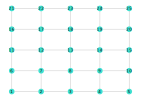

In [3]:
dims = [5, 5]
g = LG.grid(dims)

plot(g, dims)

### Hard core model a.k.a. uniform independent set

  1.292198 seconds (1.79 M allocations: 91.766 MiB, 2.28% gc time)


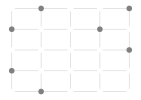

In [4]:
dims = [5, 5]
g = LG.grid(dims)
β = 1.0

hcg = PRS.HardCoreGraph(g, β)

seed = 123
@time sample = PRS.generate_sample_prs(hcg; rng=seed)

plot(hcg, sample, dims; nodelabel=nothing)

### Sink-free graph

In [5]:
dims = [5, 5]
g = LG.grid(dims)
roots = [1, 5]

sfg = PRS.SinkFreeGraph(g)

SinkFreeGraph{SimpleDiGraph{Int64}}
- graph = {25, 40} undirected simple Int64 graph

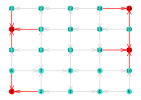

In [6]:
seed = 123
g_oriented = PRS.random_edge_orientation(sfg.graph; rng=seed)
plot(sfg, g_oriented, dims)

  0.117144 seconds (101.45 k allocations: 5.305 MiB)


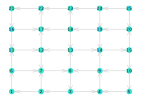

In [7]:
seed = 123
@time sample = PRS.generate_sample_prs(sfg; rng=seed)

plot(sfg, sample, dims)

### Rooted spanning forest

In [8]:
dims = [5, 5]
g = LG.grid(dims)
roots = [1, 5]

rsf = PRS.RootedSpanningForest(g, roots)

RootedSpanningForest{SimpleDiGraph{Int64}}
- graph = {25, 40} undirected simple Int64 graph
- roots = Set([5, 1])

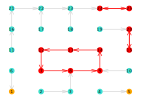

In [9]:
seed = 4
g_oriented = PRS.random_neighbor_assignment(rsf.graph, roots; rng=seed)

plot(rsf, g_oriented, dims)

  0.238856 seconds (177.59 k allocations: 9.687 MiB)


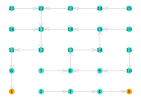

In [10]:
seed = 4
@time sample = PRS.generate_sample_prs(rsf; rng=seed)

plot(rsf, sample, dims)

### Ising

In [11]:
dims = [14, 14] # if > (14, 14) the display becomes all black, don't know why !
periodic = false
H, J = 0.0, 0.01

ising = PRS.Ising(dims, J, H; periodic=periodic)

Ising{Int64}
- graph = {196, 364} undirected simple Int64 graph
- J = 0.01 (interaction)
- h = 0.0 (magnetization)

### Grid partial rejection sampling

  0.973576 seconds (1.69 M allocations: 87.961 MiB, 6.02% gc time)


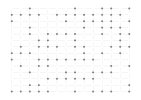

In [12]:
seed = 123
@time sample = PRS.generate_sample_grid_prs(ising; rng=seed)

plot(ising, sample, dims; nodelabel=nothing)

### Perfect Gibbs sampler

  0.310136 seconds (430.86 k allocations: 21.699 MiB)


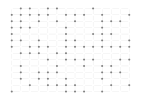

In [13]:
seed = 123
@time sample = PRS.generate_sample_gibbs_perfect(ising; rng=seed)

plot(ising, sample, dims; nodelabel=nothing)

## Spatial point processes

### Hard core point process

In [14]:
β₀ = 0.1
r = 0.05  # interaction range = 2*radius
b = β₀ / (π * (r/2)^2)
win = PRS.SquareWindow()

hc = PRS.HardCorePointProcess(b, r, win)

HardCorePointProcess{Array{Float64,1}}
- β = 50.929581789406505
- r = 0.05
- window = SquareWindow [0.0, 1.0]^2

#### Partial rejection sampling

  5.287454 seconds (11.47 M allocations: 543.412 MiB, 4.74% gc time)


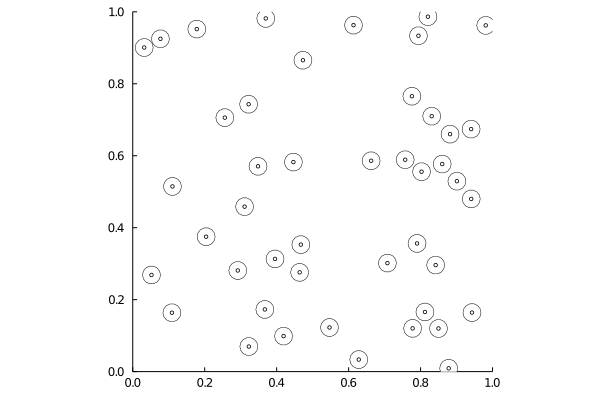

In [15]:
include("plot_utils.jl")

seed = 123
@time sample = PRS.generate_sample_prs(hc; rng=seed)

plot(hc, sample; show_center=true, radius=hc.r/2)

#### Grid partial rejection sampling

  4.108366 seconds (6.87 M allocations: 342.626 MiB, 3.01% gc time)


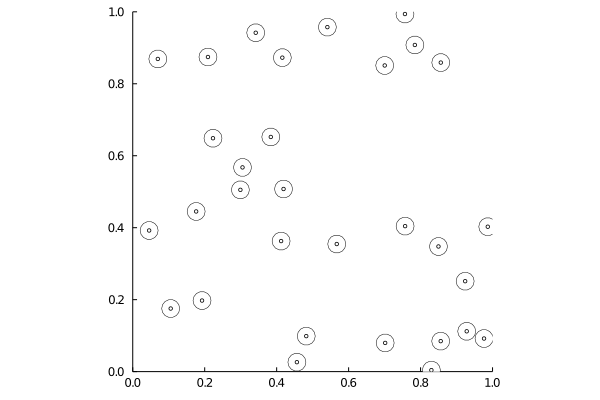

In [16]:
seed = 123
@time sample = PRS.generate_sample_grid_prs(hc; rng=seed)

plot(hc, sample; show_center=true, radius=hc.r/2)

#### Dominated CFTP

  0.002084 seconds (1.32 k allocations: 258.492 KiB)


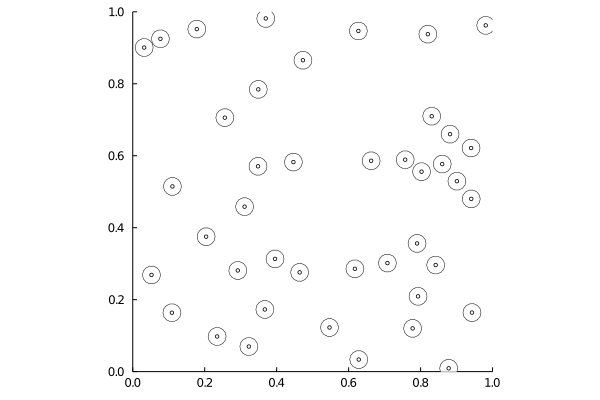

In [31]:
seed = 123
@time sample = PRS.generate_sample_dcftp(hc; rng=seed)

plot(hc, sample; show_center=true, radius=hc.r/2)

### Strauss point process

#### Partial rejection sampling = Grid partial rejection sampling

In [18]:
β₀ = 0.2
γ = 0.1  # 0.0 = hard core
r = 0.01  # interaction range = 2*radius
β = β₀ / (π * (r/2)^2)

win = PRS.SquareWindow()

strauss = PRS.StraussPointProcess(β, γ, r, win)

StraussPointProcess{Array{Float64,1}}
- β = 2546.4790894703256
- γ = 0.1
- r = 0.01
- window = SquareWindow [0.0, 1.0]^2

  1.515249 seconds (3.19 M allocations: 195.735 MiB, 4.91% gc time)


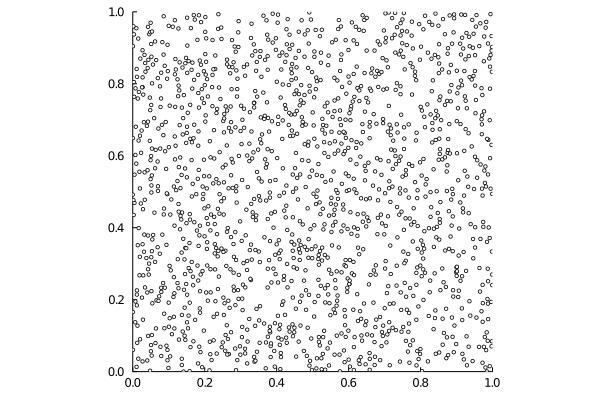

In [19]:
seed = 123
@time sample = PRS.generate_sample_grid_prs(strauss; rng=seed)

plot(strauss, sample; show_center=true)

#### Dominated CFTP

Experimental setup refers to s.9 of [E. Rubak](https://www-ljk.imag.fr/membres/Jean-Francois.Coeurjolly/documents/lecture4.pdf)

In [20]:
β, γ, r = 2.0, 0.2, 0.7  # γ = 0 ≡ Hard core

c, w = [0.0, 0.0], 10.0
win = PRS.SquareWindow(c, w)

strauss = PRS.StraussPointProcess(β, γ, r, win)

StraussPointProcess{Array{Float64,1}}
- β = 2.0
- γ = 0.2
- r = 0.7
- window = SquareWindow [0.0, 10.0]^2

  0.270712 seconds (375.80 k allocations: 20.989 MiB)


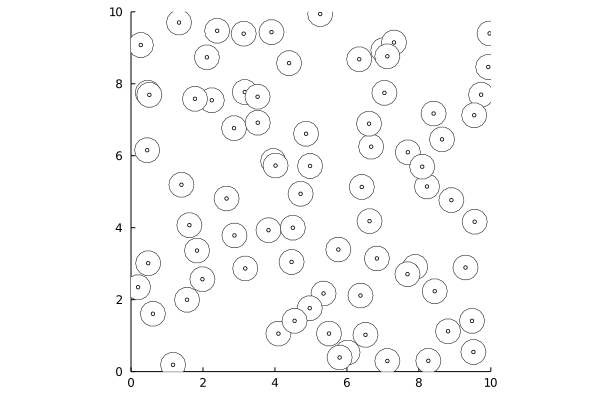

In [21]:
seed = 123
@time sample = PRS.generate_sample_dcftp(strauss; rng=seed)

plot(strauss, sample; show_center=true, radius=strauss.r/2)

## Miscellaneous

### Pattern free string

Extremal case (pattern has no common prefix-suffix)

In [22]:
alphabet = ["A", "C", "G", "T"]
pattern = "ATCG"

pfs = PRS.PatternFreeString(alphabet, pattern)

PatternFreeString{String}
- alphabet = ["A", "C", "G", "T"]
- pattern = ATCG

In [23]:
size = 100
seed = 123
@time PRS.generate_sample_prs(pfs, size; rng=123)

  0.046776 seconds (24.73 k allocations: 1.261 MiB)


"CGCCTAACCGCTTTCGAAAGATTTCGGAGCTGCCCACTCACAGGTTGCTCAATATAGATGACCCCTTGTCATCCTCGTGTTATGCACCGGCTGTACAGCG"

General case

In [24]:
alphabet = ["A", "C", "G", "T"]
pattern = "ACA"

pfs = PRS.PatternFreeString(alphabet, pattern)

PatternFreeString{String}
- alphabet = ["A", "C", "G", "T"]
- pattern = ACA

In [25]:
size = 100
seed = 123
@time PRS.generate_sample_prs(pfs, size; rng=123)

  0.045580 seconds (18.25 k allocations: 949.978 KiB)


"CGCCTAACCGCTTTCGAAAGATTTCGGAGCTGCCCACTATAAGTTTGCTCAAATCGGATGACCCCTTGTCATCCTCGTGTTATGCACCGGCTTGTTGGTG"